In [1]:
import numpy as np

In [2]:
name_list = ["dual_my", "dual_default", "org_default", "dual_no"]

data = []
for item in name_list:
    data.append(np.load("result_" + item + "_warm_start.npz"))

In [3]:
iteration_no_warm_start = np.cumsum(data[3]["iteration"])
time_no_warm_start = data[3]["Time"].item()
iteration_ave_no_warm_start = np.average(data[3]["iteration"])
iteration_ave_no_warm_start

656.546

In [5]:
Time = np.array([item["Time"] for item in data[:3]])
np.mean(Time, axis=1)
Time

array([[ 5.02590585,  4.79888344,  5.01305628,  4.42362452,  4.95573044,
         5.56899858,  4.0391922 ,  3.82754779,  4.76189446,  4.40244365],
       [ 4.93991661,  4.75250244,  5.05780554,  4.34606266,  5.50678015,
         5.40091014,  4.04263806,  4.23167276,  4.66237664,  4.65025544],
       [12.04108262, 11.21459889, 10.55632758, 10.71920705, 10.99535227,
        10.74321699,  8.62514734,  8.02951455,  8.98130774,  8.78740144]])

In [6]:
iteration = np.array([item["iteration"] for item in data[:3]])
iteration_ave = np.zeros((3, 10))
for i in range(3):
    for j in range(10):
        iteration_ave[i, j] = np.average(iteration[i, j])
        iteration[i, j] = np.cumsum(iteration[i, j])
iteration_ave

array([[ 9.702,  8.291,  9.636, 10.026,  9.992,  9.817,  9.59 ,  8.968,
        10.615,  9.372],
       [ 9.702,  8.291,  9.636, 10.026, 10.033,  9.817, 10.234,  9.339,
        10.615,  9.372],
       [ 7.78 ,  7.512,  7.531,  8.338,  7.397,  7.483,  8.063,  7.493,
         8.112,  7.551]])

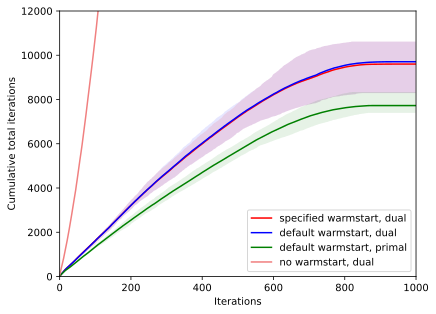

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline

backend_inline.set_matplotlib_formats("svg")

Max = np.max(iteration, axis=1)
Min = np.min(iteration, axis=1)
Mean = np.mean(iteration, axis=1)
colors = ["red", "blue", "green"]
handles = np.empty((4,), dtype=object)
for i in range(3):
    (handle,) = plt.plot(Mean[i, :], color=colors[i])
    handles[i] = handle
    plt.fill_between(
        range(1000), Max[i, :], Min[i, :], color=colors[i], alpha=0.1, edgecolor="none"
    )

(handle,) = plt.plot(iteration_no_warm_start, color="lightcoral")
handles[-1] = handle
plt.legend(
    handles,
    [
        "specified warmstart, dual",
        "default warmstart, dual",
        "default warmstart, primal",
        "no warmstart, dual",
    ],
    loc="lower right",
)
plt.xlim([0, 1000])
plt.ylim([0, 12000])
plt.xlabel("Iterations")
plt.ylabel("Cumulative total iterations")
plt.savefig("cumsum_iteration.png", dpi=500)
plt.show()

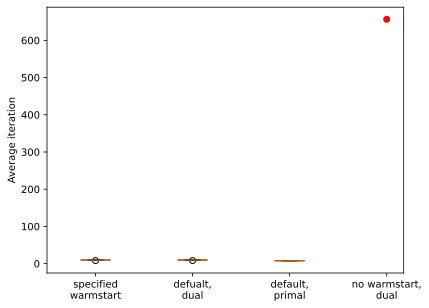

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline

backend_inline.set_matplotlib_formats("svg")

plt.boxplot(iteration_ave.T)
plt.plot(4, iteration_ave_no_warm_start, "ro")
plt.ylabel("Average iteration")
plt.xticks(
    [1, 2, 3, 4],
    [
        "specified\ndual",
        "default,\ndual",
        "default,\nprimal",
        "no warmstart,\ndual",
    ],
)
plt.savefig("average_iteration.png", dpi=500)
plt.show()

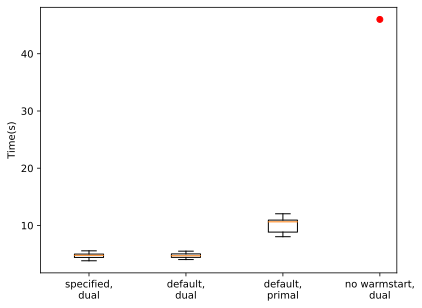

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline

backend_inline.set_matplotlib_formats("svg")

plt.boxplot(Time.T)
plt.plot(4, time_no_warm_start, "ro")
plt.ylabel("Time(s)")
plt.xticks(
    [1, 2, 3, 4],
    [
        "specified,\ndual",
        "default,\ndual",
        "default,\nprimal",
        "no warmstart,\ndual",
    ],
)
plt.savefig("total_time.png", dpi=500)
plt.show()

In [5]:
import numpy as np

data=np.load("result_SGD.npz")
Loss=data["Loss"]
w_l1norm=data["w_l1norm"]

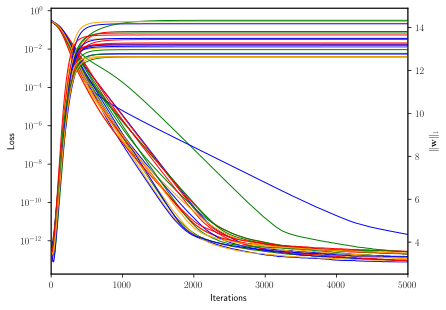

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib_inline import backend_inline

backend_inline.set_matplotlib_formats("svg")
plt.rcParams["text.usetex"] = True

fig, ax1 = plt.subplots()

# Plot the Loss values on the first y-axis
colors = ['blue', 'green', 'red', 'orange']
for i in range(Loss.shape[0]):
    ax1.semilogy(Loss[i,:5000].T, linewidth=1, color=colors[i%len(colors)])
ax1.set_xlabel("Iterations")
ax1.set_ylabel("Loss")
ax1.tick_params(axis='y')

# Create a second y-axis with a different scale for the l1norm values
ax2 = ax1.twinx()
for i in range(w_l1norm.shape[0]):
    ax2.plot(w_l1norm[i,:5000].T, linewidth=1, color=colors[i%len(colors)])
ax2.set_ylabel(r"$\|{\bf w} \|_1$")
ax2.tick_params(axis='y')

plt.xlim([0, 5000])
plt.savefig("SGD.png", dpi=500)
plt.show()